In [1]:
import pandas as pd

In [2]:
credit_data_pd = pd.read_csv('https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit.csv', 
                          sep=',')

In [3]:
credit_data_pd.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline

In [5]:
credit_data = np.array(credit_data_pd)
X = credit_data[:,1:]
y = credit_data[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [7]:
clf = DecisionTreeClassifier(random_state=0)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [9]:
import pydotplus 
from IPython.display import Image

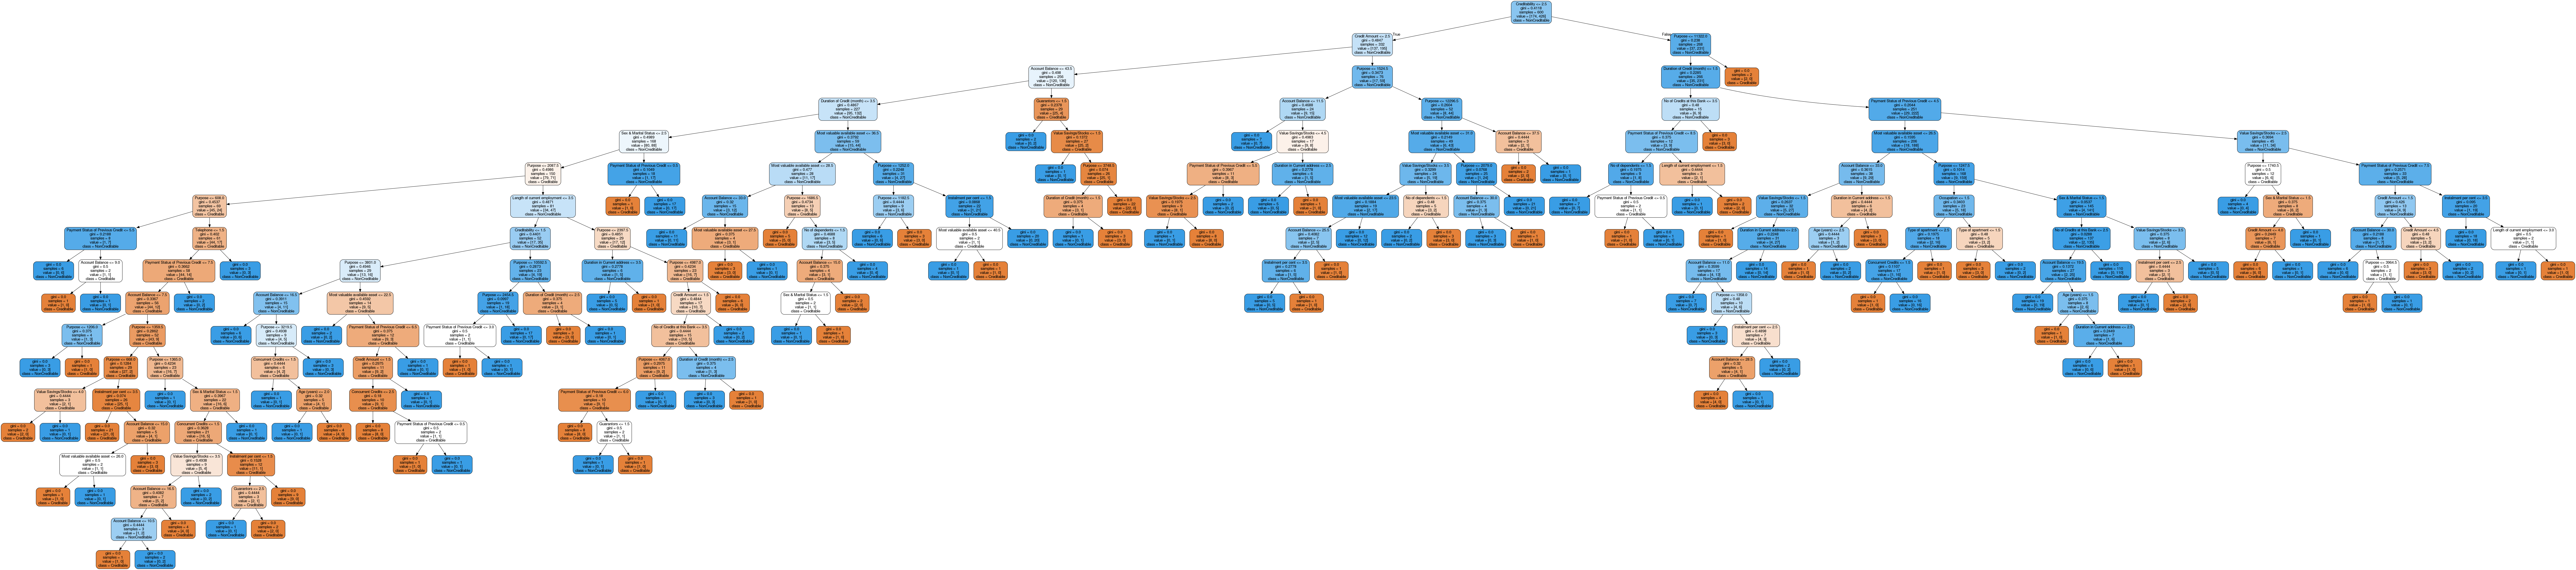

In [10]:
dot_data = tree.export_graphviz(clf, out_file="credit_data_tree.out", 
                         feature_names=credit_data_pd.columns,  
                         class_names=['Creditable', 'NonCreditable'],  
                         filled=True, rounded=True)

graph = pydotplus.graphviz.graph_from_dot_file("credit_data_tree.out")  
Image(graph.create_png())

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
depths = np.arange(2,50)
scores = [cross_val_score( DecisionTreeClassifier(random_state=0, max_depth=depth), X, y).mean() for depth in depths ]

Populating the interactive namespace from numpy and matplotlib


/home/avk/programs/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


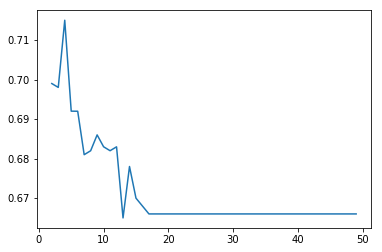

In [13]:
import matplotlib.pyplot as plt
%pylab inline

plt.plot(depths, scores)

In [14]:
from sklearn.metrics import accuracy_score
scores = [accuracy_score(DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X,y).predict(X), y) 
          for depth in depths]

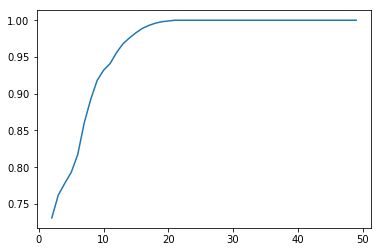

In [15]:
plt.plot(depths, scores)